In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
full_data = pd.read_csv('diabetes.csv')
full_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


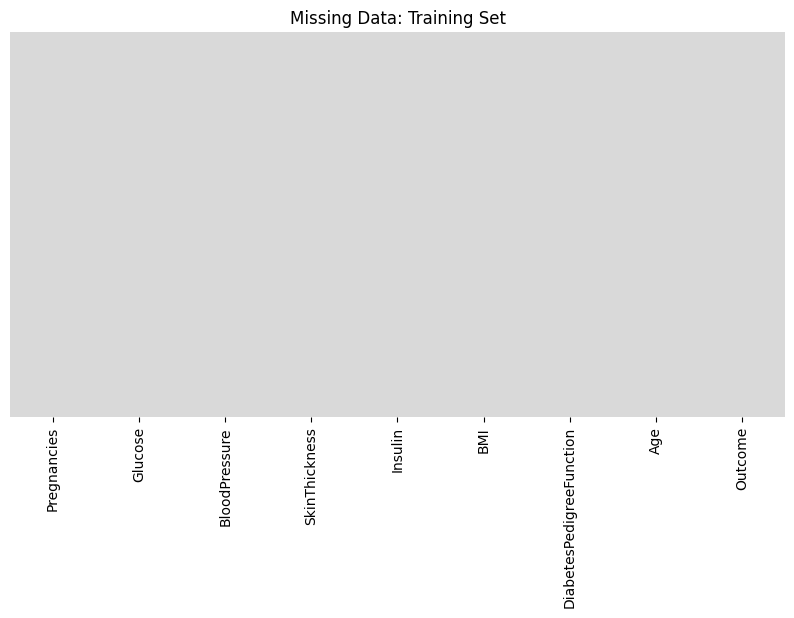

In [5]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [6]:
full_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

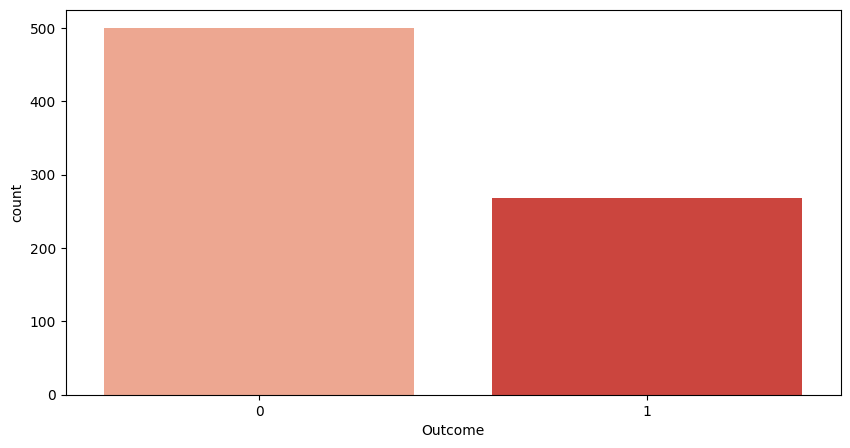

In [7]:
sns.countplot(x="Outcome",data=full_data, palette="Reds")
plt.show()

In [8]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [9]:
X = full_data.drop('Outcome', axis=1)  # Features
y = full_data['Outcome']               # Target variable

In [10]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [11]:
# Create a DataFrame for the oversampled data
new_df = pd.DataFrame(X_oversampled, columns=X.columns)
new_df['Outcome'] = y_oversampled

In [12]:
new_df['Outcome'].value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [13]:
# Numeric summary
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,4.115000,125.374000,69.576000,20.832000,85.494000,32.59690,0.482551,34.155000,0.50000
std,3.509714,32.341399,19.782304,16.299677,121.252093,7.76833,0.339166,11.602223,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.00000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.90000,0.247000,25.000000,0.00000
50%,3.000000,122.000000,72.000000,24.000000,23.000000,32.50000,0.378000,31.000000,0.50000
75%,7.000000,146.000000,80.000000,33.000000,140.000000,36.80000,0.645250,42.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.00000


In [14]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [15]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .10, random_state = 101)

In [16]:
x_train.shape
x_train

array([[ 1.10748165, -0.50653941,  0.32489716, ..., -0.60492414,
         0.46445565, -0.27206671],
       [-0.31784866,  1.00930468,  0.32489716, ..., -0.12839296,
         1.08688031, -0.53076722],
       [-1.17304684,  1.22585383,  1.03295447, ...,  2.53760584,
        -0.16386878, -0.96193474],
       ...,
       [ 0.25228346, -0.32092585,  0.32489716, ..., -0.17990984,
        -0.41165869,  0.84896885],
       [ 1.39254771,  0.14310806,  0.02144402, ...,  0.2064668 ,
         0.4998542 ,  0.93520235],
       [-1.17304684,  1.93737248,  0.62835029, ..., -0.07687607,
         0.5883506 , -1.04816824]])

In [17]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 75.0 %


Precision: 0.83
Recall: 0.74
------------------------------------------------------------
[[30  9]
 [16 45]]


<Axes: >

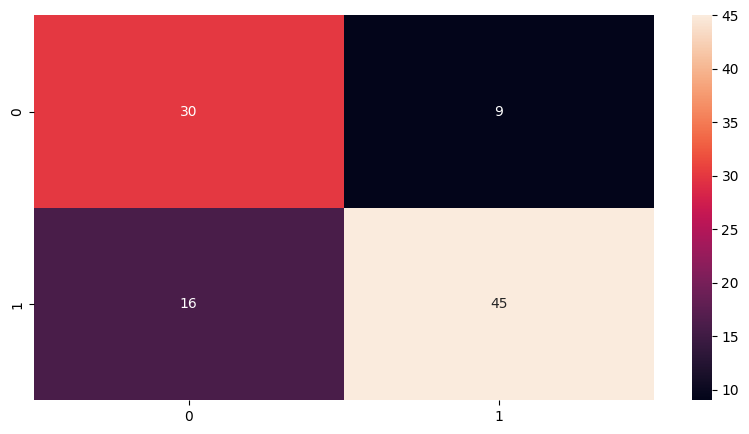

In [19]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

In [20]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 86.0 %


Precision: 0.89
Recall: 0.89
------------------------------------------------------------


<Axes: >

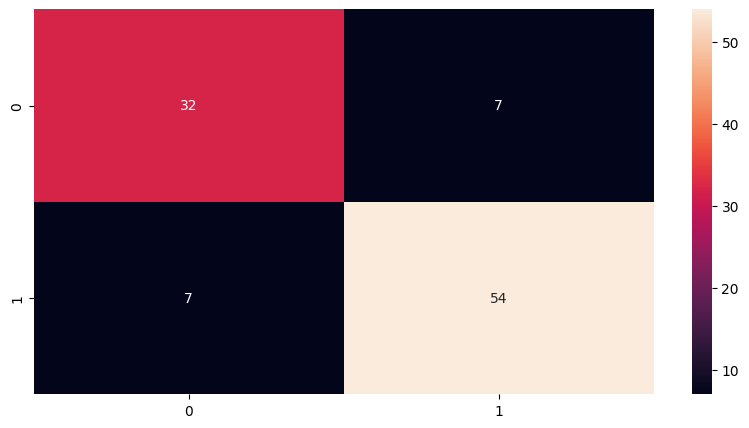

In [22]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

In [23]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Random Forest Classifier": rfc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Random Forest Classifier: 86.0
2. Logistic Regression: 75.0


In [24]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(rfc, f)

print("Models saved successfully.")

Models saved successfully.
